In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
plt.rcParams["figure.figsize"] = (16, 10)

# Dataset: 120 years of Olympic history: athletes and results

Basic bio data on athletes and medal results from Athens 1896 to Rio 2016.

**\*Obs:** Dataset obtido pelo [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=athlete_events.csv).

## Dataset

In [2]:
df = pd.read_csv('datasets/athlete_events.csv')
df_noc = pd.read_csv('datasets/noc_regions.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Informações gerais do dataset

Este dataset possui 271116 linhas e 15 colunas. Cada linha representa as informação de um evento de um atleta. O ID é usado como identificador porque podem existir nome repetidos no dataset. NaN na coluna 'Medal' significa que o atleta não ganhou nenhuma medalha naquele evento. As informações são desde 1896 em Atenas até 2016 no Rio de Janeiro.

Os atributos são:
* ID - identificador do atleta
* Name - nome do atleta
* Sex - sexo do atleta (M e F)
* Age - idade do atleta
* Height - altura do atleta em cm
* Weight - peso do atleta em kg
* Team - país que o atleta representa
* NOC - National Olympic Committee
* Games - ano e temporada do evento
* Year - ano do evento
* Season - temporada do evento
* City - cidade em que aconteceu o evento
* Sport - esporte que o atleta participou
* Event - nome do evento
* Medal - medalha que o atleta ganhou (NaN, Gold, Bronze e Silver)

## Matriz de correlação

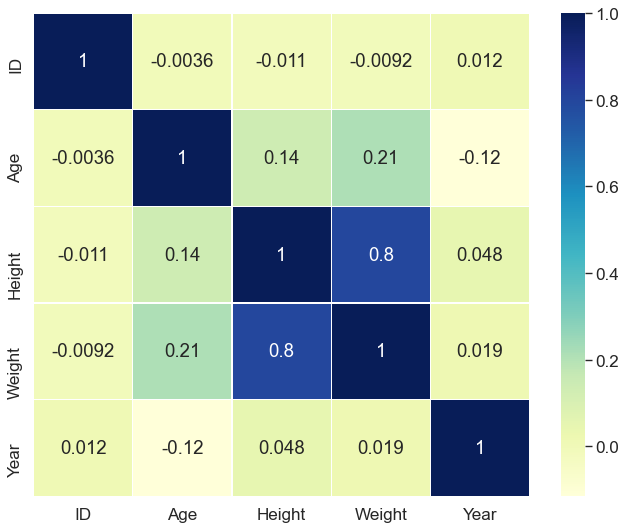

In [3]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(df.corr(), annot=True, linewidth=0.2, cmap='YlGnBu')
plt.show()

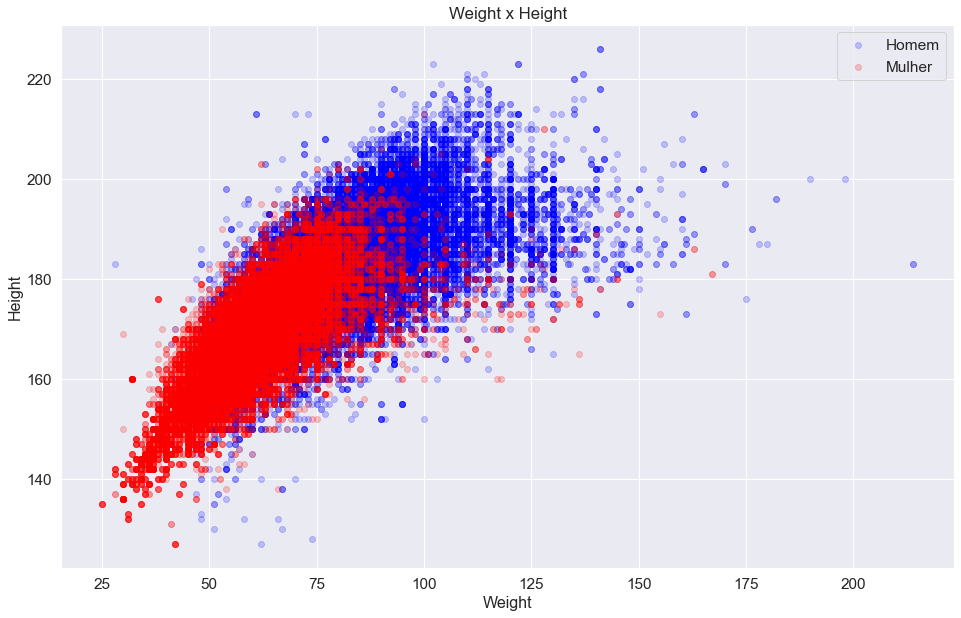

In [4]:
fig, axes = plt.subplots(figsize=(16, 10))
df_w = df[df['Sex'] == 'F']
df_m = df[df['Sex'] == 'M']
plt.scatter(df_m['Weight'], df_m['Height'], c = 'blue', alpha=0.2)
plt.scatter(df_w['Weight'], df_w['Height'], c = 'red', alpha=0.2)
plt.legend(['Homem','Mulher'])
plt.xlabel('Weight', fontsize=16)
plt.ylabel('Height', fontsize=16)
plt.title('Weight x Height')
plt.show()

In [5]:
df.loc[(df['Name'] == 'Choi Myong-Hui')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40850,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


## Análise

É possível fazer algumas contagens para termos uma noção de sua distribuição.

### Contagem do número do tipo de sexo

Podemos ver nos gráficos abaixo que o número de homens participando de olímpidas é bem maior que o número de mulheres. Somente 27.5% de mulheres presente nas olímpiadas.

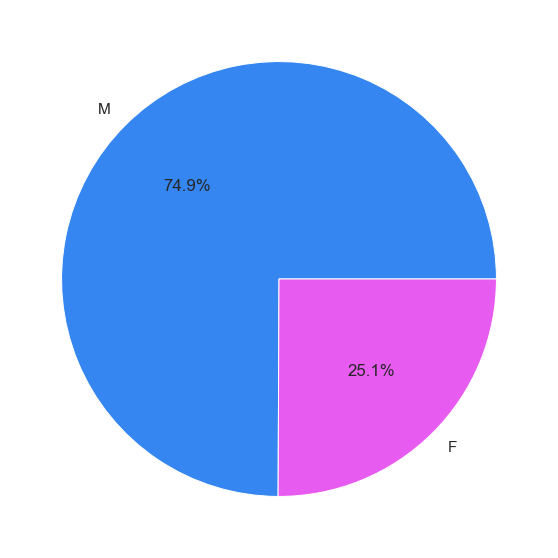

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1)
_df = df.drop_duplicates(subset='ID', keep="first")
_df.Sex.value_counts(normalize=True).plot(kind='pie', colors=['#3586F0','#E85BF0'], ax=axes, autopct='%1.1f%%')
axes.set_ylabel('')
plt.show()

# sns.set(font_scale=1.4)
# _df.Sex.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
# plt.xlabel("Gênero", labelpad=14)
# plt.ylabel("Número de pessoas", labelpad=14)
# plt.title("Número de pessoas por gênero", y=1.02);
# plt.show()

### Modalidades com mais medalhas de ouro

<AxesSubplot:>

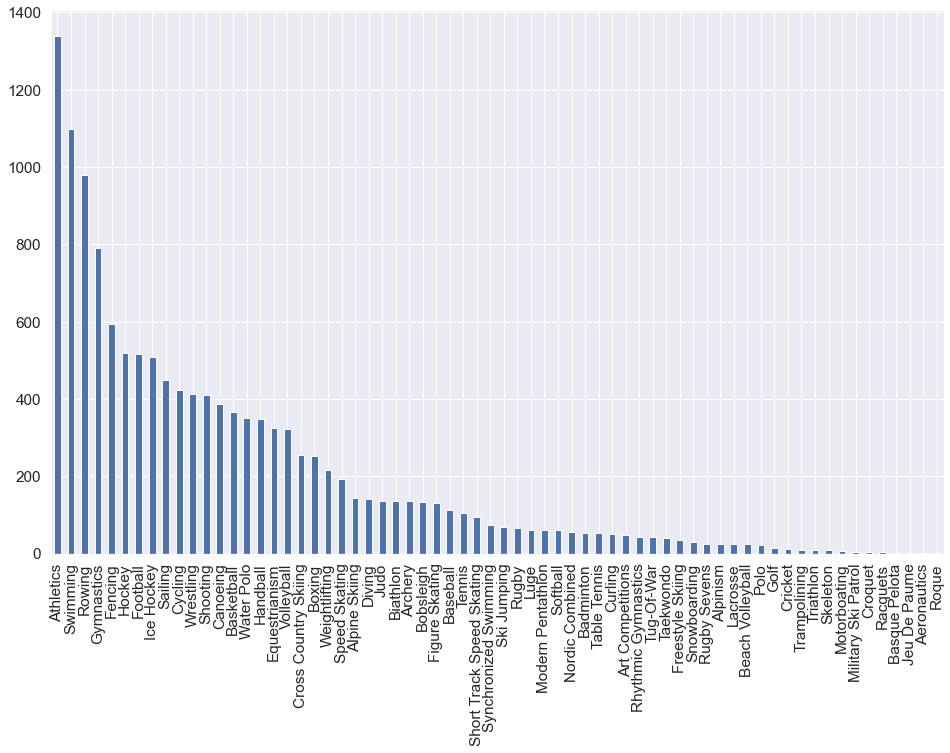

In [7]:
df_gold = df.loc[df['Medal'] == 'Gold']
df_gold.Sport.value_counts().plot(kind='bar')

Podemos ver que a modalidade Atletismo é a que possui o maior número de medalhas de ouro. Esse resultado pode ser esperado porque Atletismo é um conjunto de esportes formado por várias modalidades: corrida, salto, marcha e lançamentos, portanto o número de medalhas de ouro é superior as demais. Podemos também observar que atletas do sexo masculino são os que mais possuem medalhas de ouro.

In [8]:
df_gold.City.value_counts().head()

London            1215
Athina             883
Los Angeles        726
Beijing            671
Rio de Janeiro     665
Name: City, dtype: int64

A tabela acima mostra o número de medalhistas de ouro por cidade. Em primeiro lugar temos a cidade de Londres e, como podemos ver, Rio de Janeiro ocupa a 5º posição nesse ranking. Vamos buscar mais informações a respeito do Rio de Janeiro.

<AxesSubplot:>

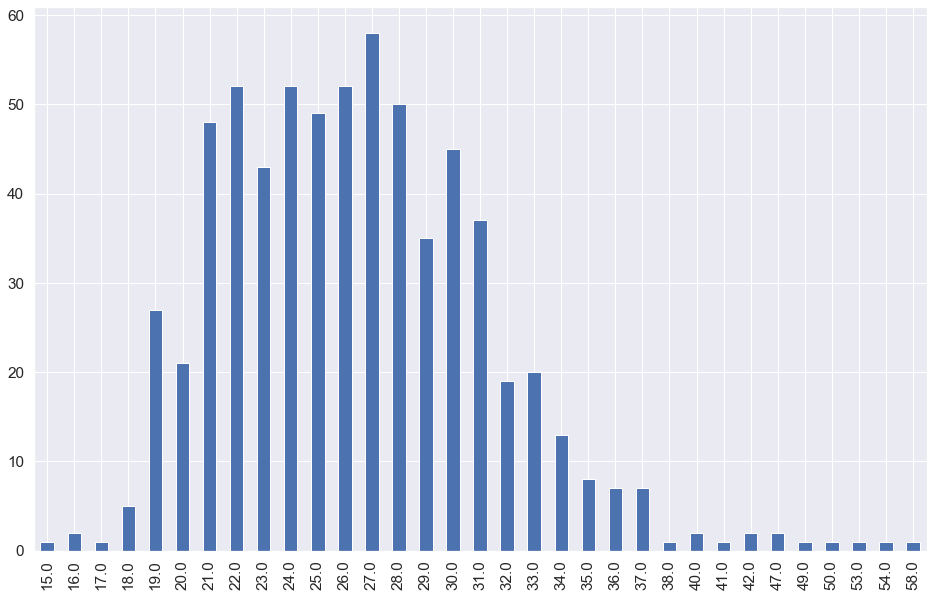

In [9]:
df_gold_rj = df_gold[df_gold['City'] == 'Rio de Janeiro']
df_gold_rj.Age.sort_values().value_counts(sort=False).plot(kind='bar')

A maioria dos medalhistas de ouro do Rio de Janeiro são jovens entre 21 e 30 anos.

### TODO

* Plot entre Team com duplas nacionalidades e o NOC - lixo
* **Aumento do número de atletas mulheres ao longo dos anos** ok
* Comparativo geral entre temporadas: Summer e Winter - se der tempo
* **Cálculo do IMC e análises** ok 
* **Competidor que mais participou/mais ganhou** ok
* Sumário por olimpíada ok
* Cidade que já sediaram olimpíadas de Inverno e de Verão - vou fazer
* **Esportes que foram adicionados ao longo dos anos** semi ok
 - Barplot ao longo dos anos mostrando novas modalidades - n vai da
* **Rio de Janeiro vs Atenas: fazer uma análise geral** ok

## Aumento do número de mulheres ao longo dos anos

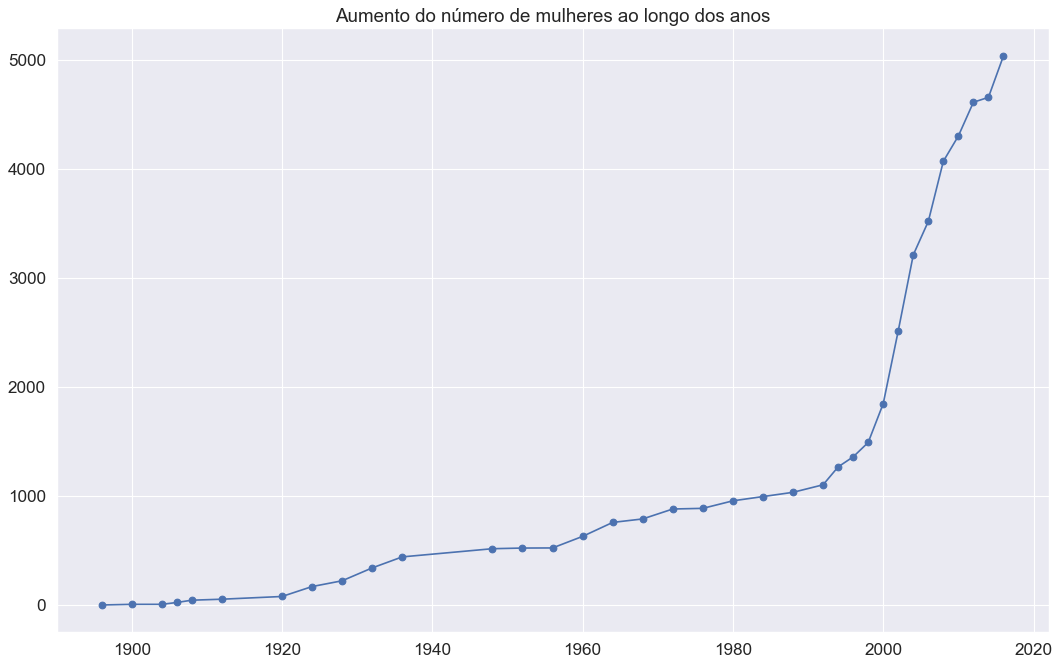

In [10]:
# cálculo do número de mulheres ao longo dos anos
df_women = df.loc[df['Sex'] == 'F']
women = {k: np.unique(list(v)).size for k, v in df_women.groupby('Year')['ID']}
women[1896] = 0 # adicionado na mão, pq na primeira olimpíada não teve nenhuma mulher

xw = sorted(women.keys())
yw = sorted(women.values())

plt.figure(figsize=(16,10), dpi= 80)
plt.plot(xw, yw, '-o')
plt.title('Aumento do número de mulheres ao longo dos anos')
plt.show()

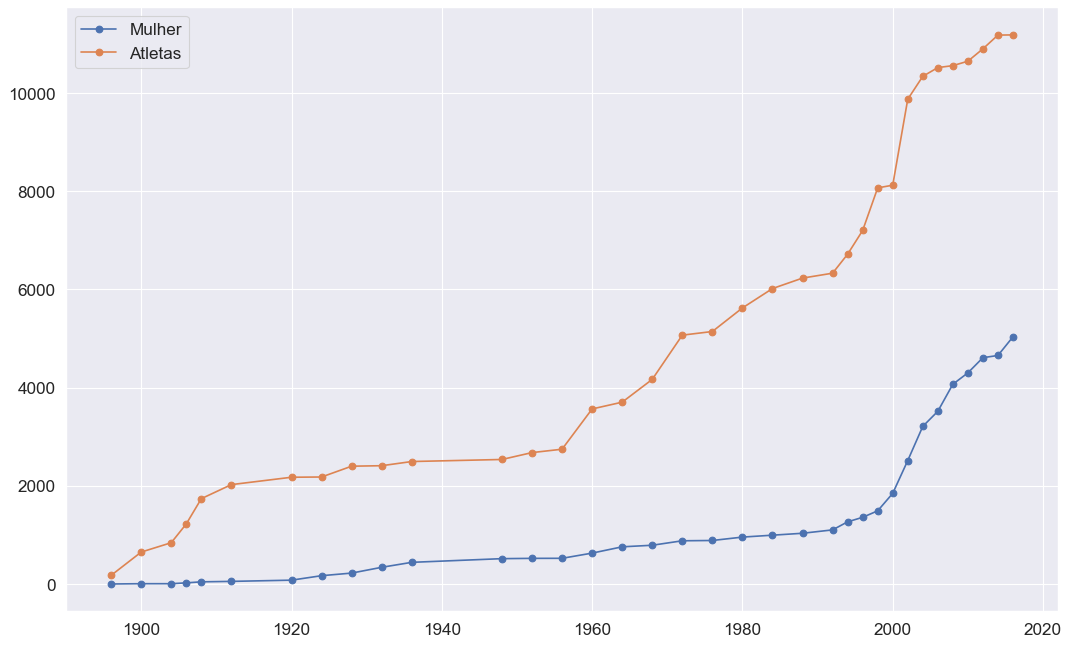

In [11]:
# número de atletas ao longo dos anos

men = {k: np.unique(list(v)).size for k, v in df.groupby('Year')['ID']}

xm = sorted(men.keys())
ym = sorted(men.values())

plt.figure(figsize=(16,10), dpi= 80)
plt.plot(xw, yw, '-o')
plt.plot(xm, ym, '-o')
plt.legend(['Mulher', 'Atletas'])
plt.show()

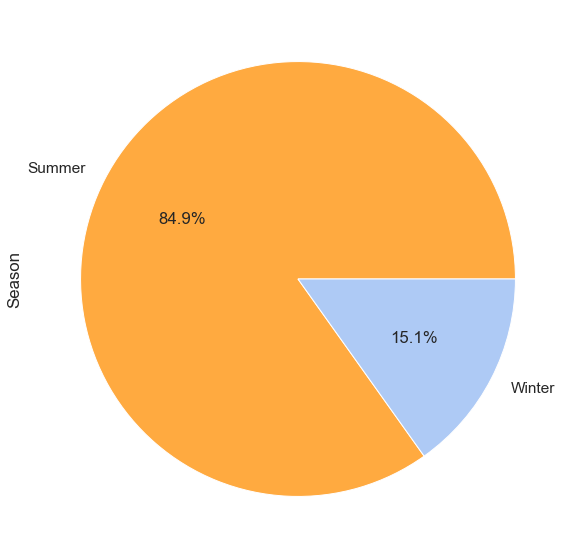

In [12]:
# mulheres por temporada

# _df*: dataset sem duplicatas
_df_women = df_women.drop_duplicates(subset='ID', keep="first")
df_men = df.loc[df['Sex'] == 'M']
_df_men = df_men.drop_duplicates(subset='ID', keep="first")

_df_women.Season.value_counts(normalize=True).plot(kind='pie', colors=['#FFAA40','#AECAF5'], autopct='%1.1f%%')
plt.show()

In [13]:
_df_men.Sport.value_counts(ascending=False)

Athletics        15459
Rowing            6188
Football          5424
Boxing            5194
Cycling           5089
                 ...  
Croquet              7
Racquets             5
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 63, dtype: int64

In [14]:
_df_women.Sport.value_counts()

Athletics                    6521
Swimming                     3617
Gymnastics                   1499
Rowing                       1481
Volleyball                   1128
Handball                     1024
Hockey                        996
Alpine Skiing                 996
Basketball                    932
Fencing                       880
Figure Skating                824
Judo                          757
Shooting                      737
Football                      734
Cross Country Skiing          706
Canoeing                      702
Cycling                       700
Sailing                       628
Diving                        627
Rhythmic Gymnastics           567
Synchronized Swimming         550
Speed Skating                 525
Archery                       500
Ice Hockey                    498
Tennis                        486
Equestrianism                 459
Badminton                     412
Table Tennis                  377
Softball                      366
Weightlifting 

C:\Users\thali\miniconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


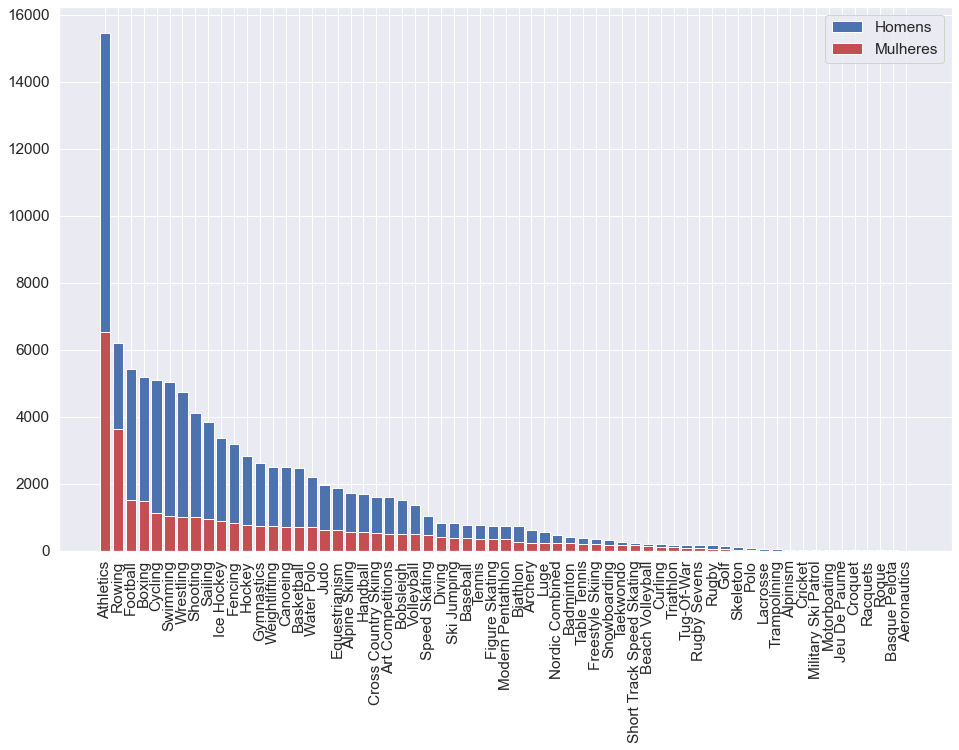

In [15]:
mvalues = _df_men.Sport.value_counts().values
wvalues = _df_women.Sport.value_counts().values

labels =  _df_men.Sport.value_counts().index

xm = np.arange(len(mvalues))
xw = np.arange(len(wvalues))
width = 0.8


# melhor maneira de plotar esses graficos, junto n da certo
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(xm, mvalues, color='b', width=width, label='Homens')
ax.bar(xw, wvalues, color='r', width=width, label='Mulheres')
ax.legend()
ax.set_xticklabels(labels, rotation='vertical')
ax.set_xticks(xm)
plt.show()

In [16]:
# _df_women.Sport.value_counts().plot(kind='bar') # esportes mais praticados
# _df_men.Sport.value_counts().plot(kind='bar')
# plotar o dos homens tbm

<AxesSubplot:>

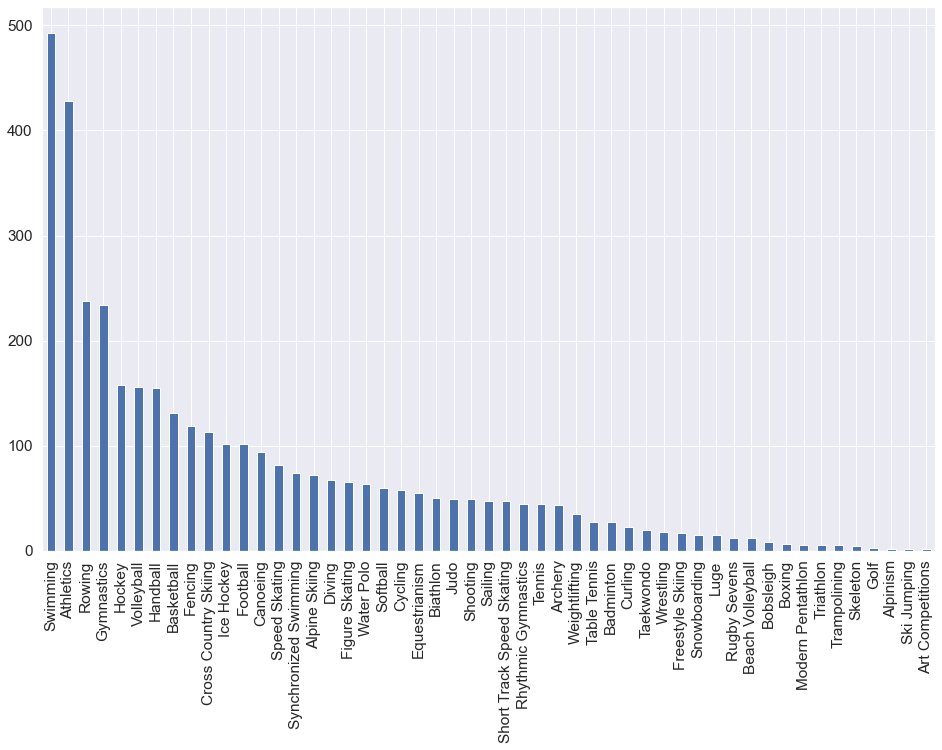

In [17]:
df_women_gold = df_women.loc[df['Medal'] == 'Gold']
df_women_gold.Sport.value_counts().plot(kind='bar') # esportes com mais medalhas de ouro

### O número de mulheres nas modalidades Atléticas é maior que na modalide Natação, mas o númer de medalhes de ouro é maior na modalidade Natação.

## Análise do IMC (Índice de massa corporal)

\begin{equation*}
\text{IMC = } \frac{Weight}{(Height)^2}.
\end{equation*}

In [18]:
imc_df = df.copy()
imc_df = imc_df.dropna(axis=0, subset=['Height', 'Weight']) # dropping NaN - not a number
imc_df['IMC'] = imc_df['Weight'] / (imc_df['Height']/100) ** 2 # calculating IMC
#imc_df.head()

# procurar imc ideal
df_atletas = imc_df.drop_duplicates(subset='ID', keep="first")
df_atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,21.220009
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,21.499597


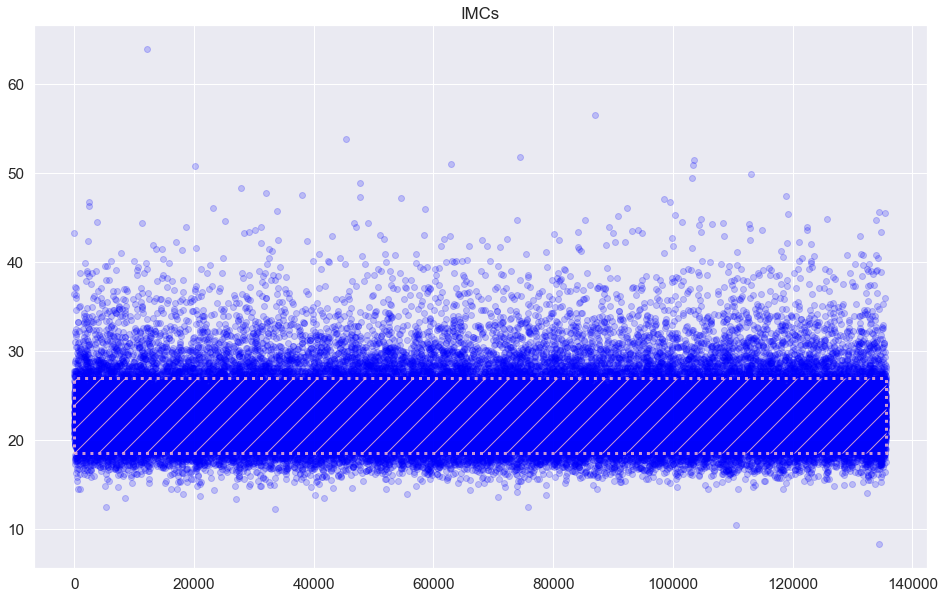

In [19]:
fig, axes = plt.subplots(figsize=(16, 10))
axes.add_patch( Rectangle((0, 18.5), 
                        max(df_atletas['ID']), 8.5, 
                        fc ='None',
                        alpha = 0.8,
                        ec ='pink',
                        hatch = '/',
                        ls = ':',
                        lw = 3) ) 
plt.scatter(df_atletas['ID'], df_atletas['IMC'], c = 'blue', alpha=0.2)
plt.title('IMCs')
plt.show()

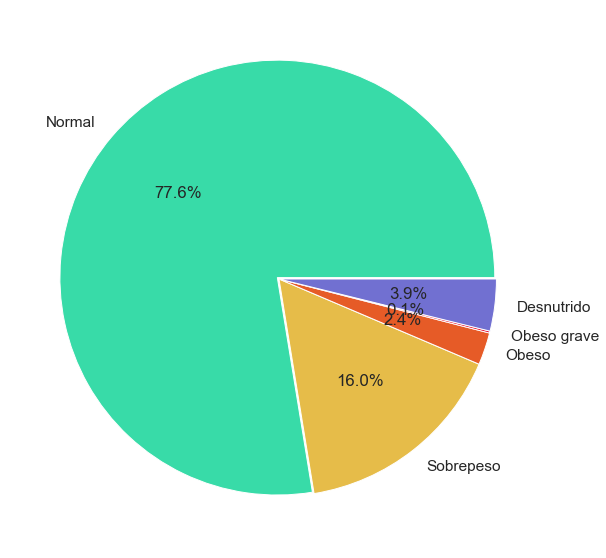

In [20]:
df_imclassified = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}


for atl in df_atletas['IMC']:
    if 18.5 <= atl < 25:
        df_imclassified['Normal'] += 1
    elif 25 <= atl < 30:
        df_imclassified['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imclassified['Obeso'] += 1
    elif atl >= 40:
        df_imclassified['Obeso grave'] += 1
    else:
        df_imclassified['Desnutrido'] += 1

labels = list(df_imclassified.keys())
sizes = list(df_imclassified.values())
explode = (0.01, 0, 0, 0.0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, colors = ['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct='%1.1f%%')


plt.show()

## Novos esportes ao longo dos anos

In [21]:
hist_aux = []
df_sports = df.copy()
sports = {k: list(set(v)) for k, v in df_sports.groupby('Year')['Sport']}
new_sports = {1896: sports.pop(1896)}
# gráfico em formato de barra (mayb)

for item in new_sports[1896]:
    hist_aux.append(item)

for k, v in sports.items():
    new_sports[k] = []
    for item in v:
        if item not in hist_aux:
            hist_aux.append(item)
            new_sports[k].append(item)
new_sports

{1896: ['Cycling',
  'Tennis',
  'Swimming',
  'Gymnastics',
  'Wrestling',
  'Shooting',
  'Athletics',
  'Fencing',
  'Weightlifting'],
 1900: ['Football',
  'Water Polo',
  'Sailing',
  'Tug-Of-War',
  'Cricket',
  'Equestrianism',
  'Basque Pelota',
  'Rugby',
  'Polo',
  'Golf',
  'Rowing',
  'Croquet',
  'Archery'],
 1904: ['Diving', 'Lacrosse', 'Boxing', 'Roque'],
 1906: [],
 1908: ['Racquets',
  'Motorboating',
  'Hockey',
  'Figure Skating',
  'Jeu De Paume'],
 1912: ['Art Competitions', 'Modern Pentathlon'],
 1920: ['Ice Hockey'],
 1924: ['Nordic Combined',
  'Bobsleigh',
  'Curling',
  'Military Ski Patrol',
  'Speed Skating',
  'Alpinism',
  'Ski Jumping',
  'Cross Country Skiing'],
 1928: ['Skeleton'],
 1932: [],
 1936: ['Aeronautics', 'Handball', 'Canoeing', 'Basketball', 'Alpine Skiing'],
 1948: [],
 1952: [],
 1956: [],
 1960: ['Biathlon'],
 1964: ['Luge', 'Volleyball', 'Judo'],
 1968: [],
 1972: [],
 1976: [],
 1980: [],
 1984: ['Synchronized Swimming', 'Rhythmic Gymna

In [82]:
len(years)

35

In [140]:
len(new_sports[1896])

9

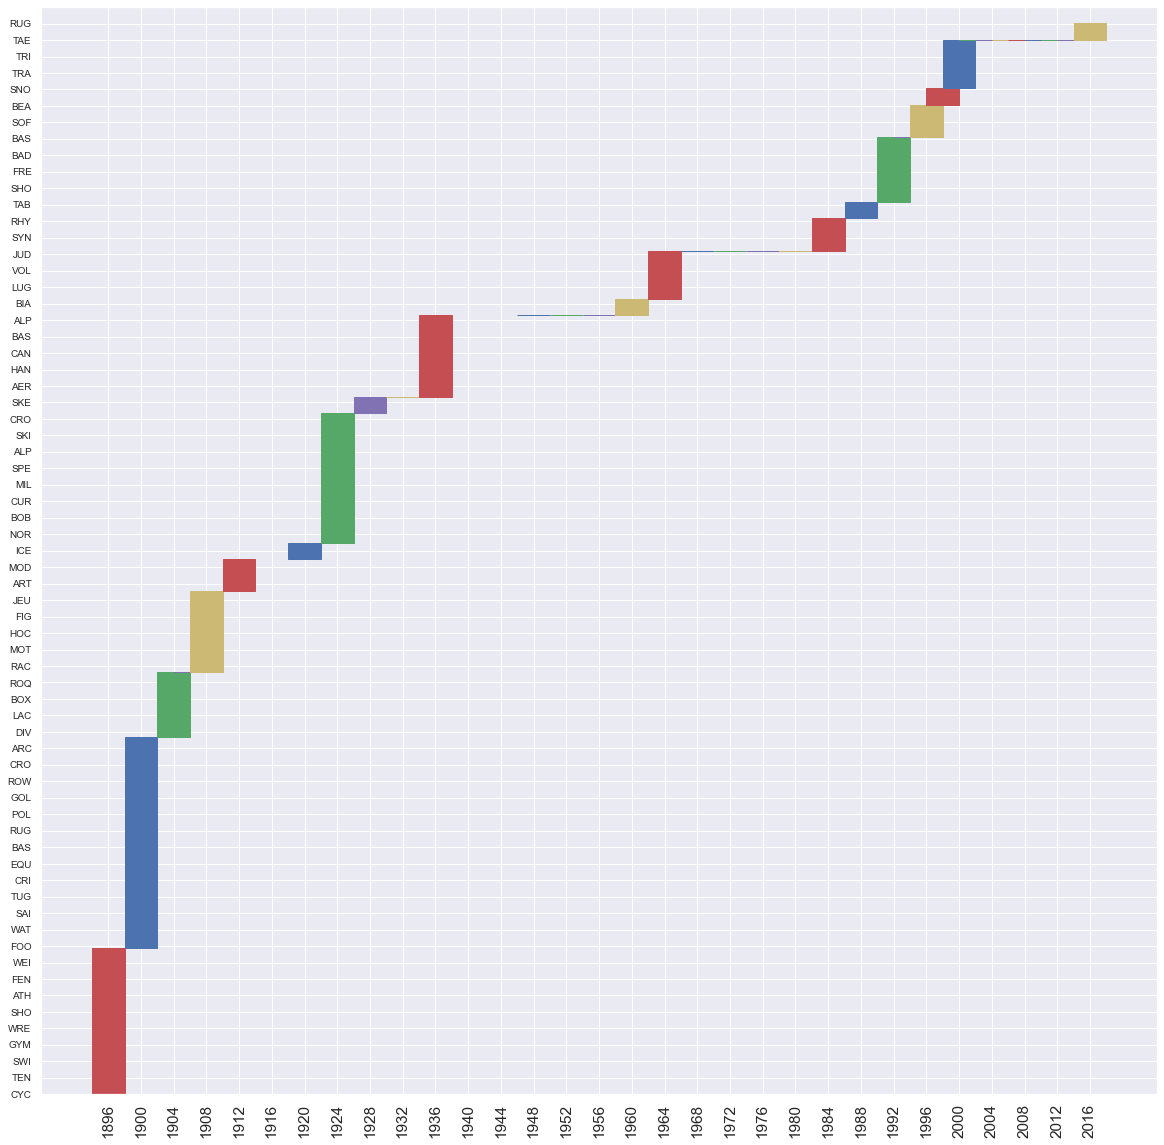

In [155]:
#Plotar novos esportes por ano
fig, axes = plt.subplots(figsize=(20, 20))

labels = [h[0:3].upper() for h in hist_aux]
years = list(new_sports.keys())

vetor_rect = []
h = 0
r = 0.985
colors = ['r', 'b', 'g', 'm', 'y'] * 7
for i, year in enumerate(years):
    if len(new_sports[year]) == 0: pass
    vetor_rect.append(Rectangle((year-2, h), 4, len(new_sports[year])*r, color=colors[i]))
    h += len(new_sports[year])*r
    axes.add_patch(vetor_rect[i])

plt.plot()
plt.xticks(np.arange(1896, 2020, step=4), rotation=90)
plt.ylim([0, len(labels)])
plt.yticks(np.arange(len(labels)), labels)
axes.tick_params(axis='y', labelsize=10)

plt.show()

## NOC

In [23]:
df_merged = pd.merge(df, df_noc, on='NOC', how='left')
df_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Medalhas por cidade

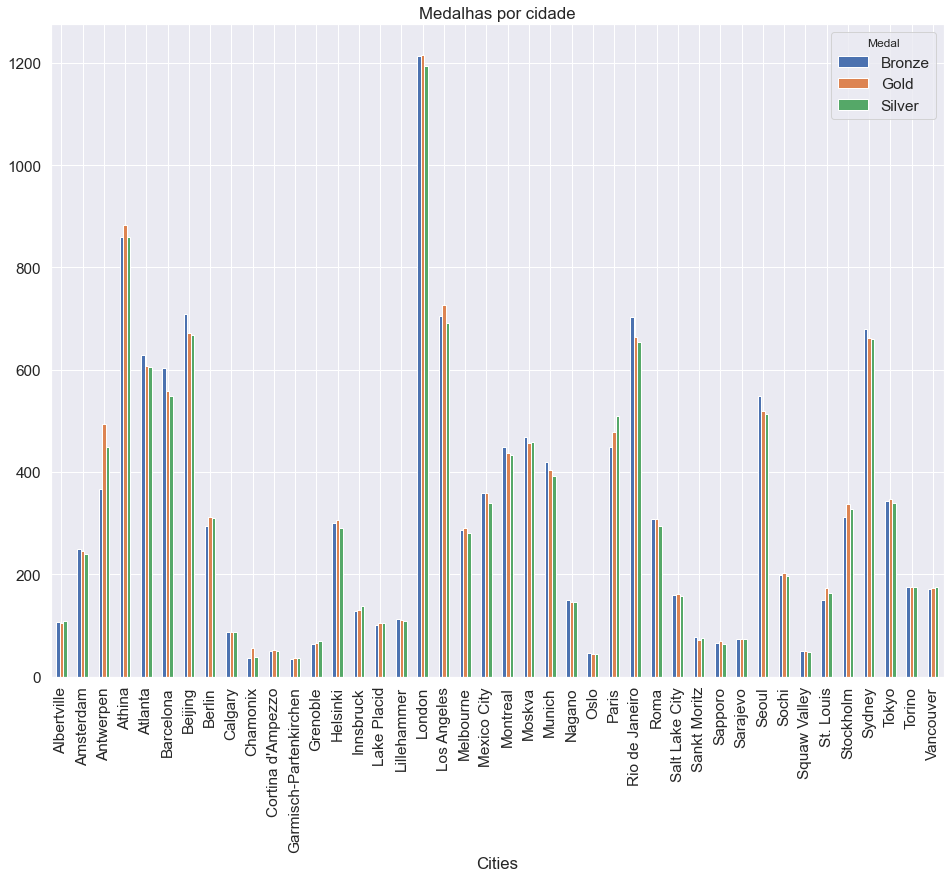

In [24]:
table = pd.crosstab(df['City'], df['Medal'])
ax = table.plot(kind='bar',
                figsize=(16, 12),
                title="Medalhas por cidade")
ax.set_xticks(range(len(table)))
ax.set_xlabel("Cities")
ax.set_xticklabels(table.index);

### Medalhas por país

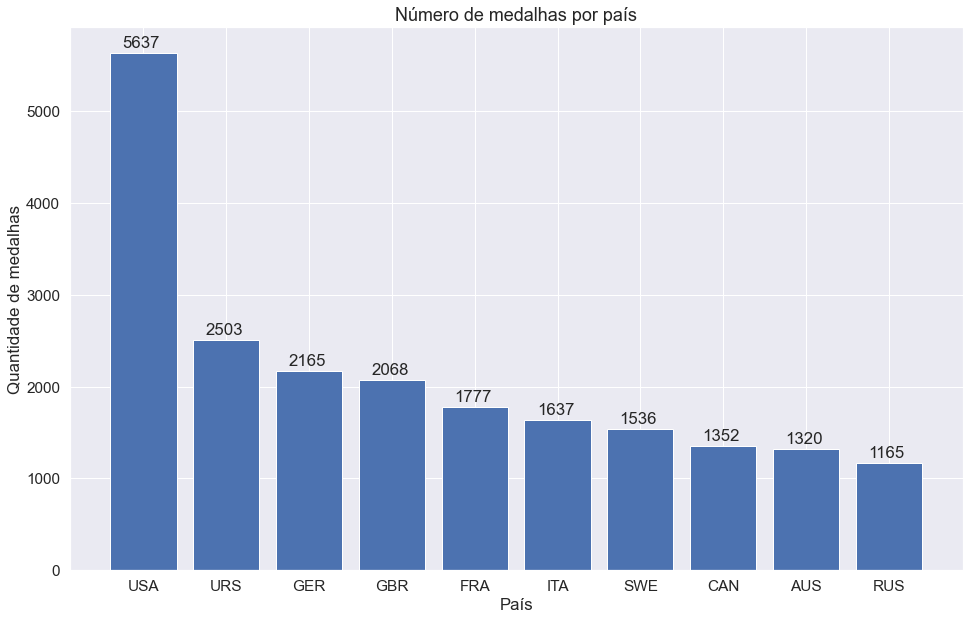

In [25]:
height = df_merged.groupby(['NOC'])['Medal'].count().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(height.index, height)
ax.set_xlabel('País')
ax.set_ylabel('Quantidade de medalhas')
plt.title('Número de medalhas por país', fontsize=18)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in range(0,10)]
xlabs=[label for label in height.index]
for i, v in enumerate(height):
    plt.text(xlocs[i] - 0.25, v + 60, str(v))
plt.xticks(xlocs, xlabs)
plt.show()

## Competidor que mais ganhou/perdeu

In [26]:
adf = df.copy()
count = df.groupby('ID')['Medal'].count().sort_values(ascending=False)
first = count.index[0]
lasts = count.index[-30:]

### Competidor que mais ganhou

In [27]:
first_df = adf.loc[adf['ID'] == first] # michael Phelps
first_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
187888,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold


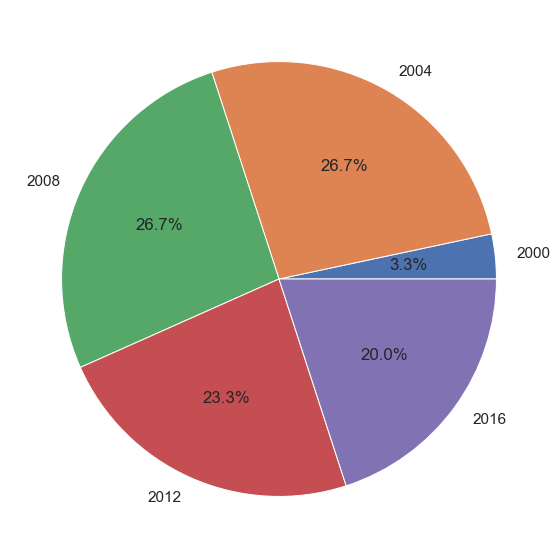

In [28]:
first_df.groupby('Year').size().plot(kind='pie', figsize=(16, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.show()
# trocar por numero de medalhas

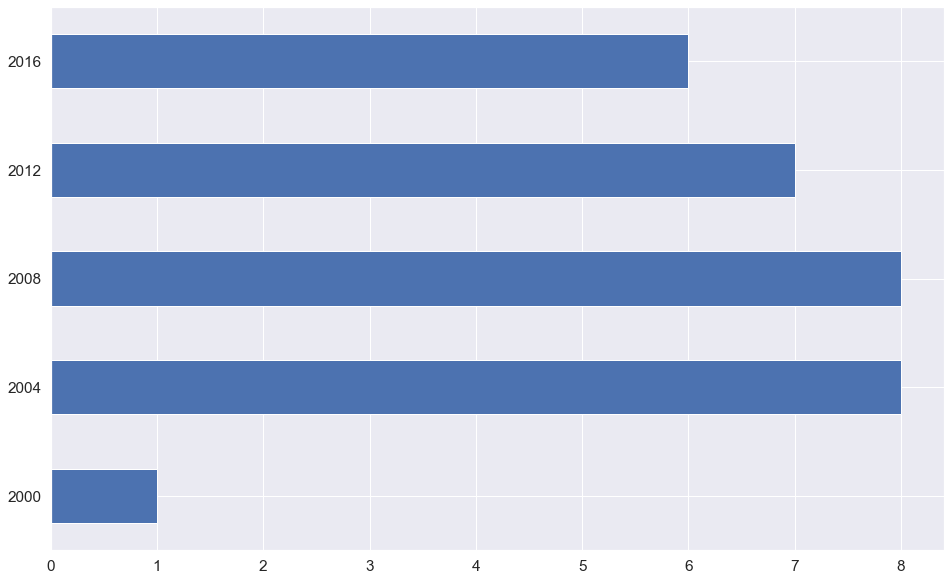

In [29]:
first_df.groupby('Year').size().plot(kind='barh', figsize=(16, 10))
plt.ylabel('')
plt.show()

### Competidores que não ganharam nenhuma medalha

In [30]:
lasts_df = adf.loc[adf['ID'].isin(lasts)]
lasts_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
169065,84987,Fabio Nebuloni,M,27.0,180.0,77.0,Italy,ITA,1996 Summer,1996,Summer,Atlanta,Modern Pentathlon,Modern Pentathlon Men's Individual,NaN
169066,84988,Silvio Necchi,M,25.0,168.0,70.0,Italy,ITA,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed Two Person Dinghy,NaN
169067,84989,Souad Al-Nechab,F,24.0,178.0,60.0,Algeria,ALG,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN
169068,84990,Yevgeny Nechayev,M,20.0,176.0,76.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Men's Hockey,NaN


In [31]:
# procurar o competidor que mais participou e não ganhou nada

## Rio de Janeiro vs Atenas

In [32]:
rj_at_df = df.copy()
rj_at_df = df.loc[df['Year'].isin([1896, 2016])]
_rj_at_df = rj_at_df.drop_duplicates(subset='ID', keep="first")
rj_at_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271024,135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
271053,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
271054,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN
271055,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN


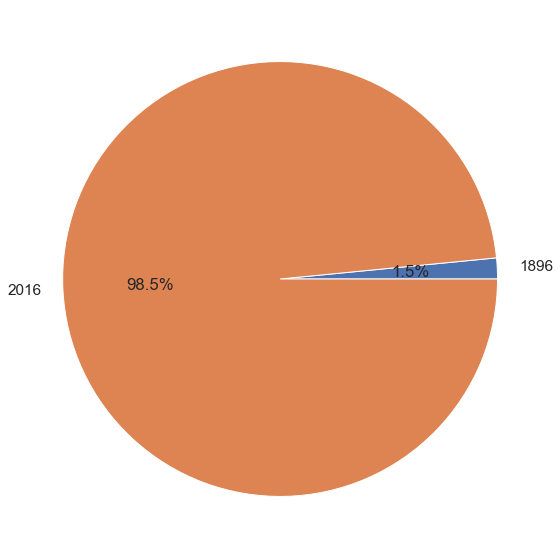

In [33]:
_rj_at_df.groupby('Year').size().plot(kind='pie', figsize=(16, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [34]:
#SUMMARY
def avg(l):
    return sum(l)/len(l)

df_uni = df.drop_duplicates(subset='ID', keep="first")
df_atenas = df_uni.loc[(df_uni['Year'] == 1896)]
df_rio = df_uni.loc[(df_uni['Year'] == 2016)]

imc_por_ano = {k: list(set(v)) for k, v in df_atletas.groupby('Year')['IMC']}
imc_Atenas = imc_por_ano.pop(1896)
imc_Rio = imc_por_ano.pop(2016)


altura_atenas = df_atenas['Height'].dropna(axis=0)
altura_rio = df_rio['Height'].dropna(axis=0)

idade_atenas = df_atenas['Age'].dropna(axis=0)
idade_rio = df_rio['Age'].dropna(axis=0)

modalidades_atenas = df_atenas.drop_duplicates(subset='Sport', keep="first")
modalidades_rio = df_rio.drop_duplicates(subset='Sport', keep="first")

mulheres_atenas = df_atenas.loc[(df_atenas['Sex'] == 'F')]
mulheres_rio = df_rio.loc[(df_rio['Sex'] == 'F')]


print("Número de atletas em Atenas (1896): " + str(len(df_atenas)))
print("Número de atletas no Rio (2016): " + str(len(df_rio)))
print('____________________________________________________\n')

print("Número de atletas femininas em Atenas (1896): " + str(len(mulheres_atenas)))
print("Número de atletas femininas no Rio (2016): " + str(len(mulheres_rio)))
print('____________________________________________________\n')

print("IMC médio em Atenas (1896): " + str(avg(imc_Atenas)))
print("IMC médio no Rio (2016): " + str(avg(imc_Rio)))
print('____________________________________________________\n')

print("Altura média em Atenas (1896): " + str(avg(altura_atenas)))
print("Altura média no Rio (2016): " + str(avg(altura_rio)))
print('____________________________________________________\n')

print("Mais alto em Atenas (1896): " + str(max(altura_atenas)))
print("Mais alto no Rio (2016): " + str(max(altura_rio)))
print('____________________________________________________\n')

print("Mais baixo em Atenas (1896): " + str(min(altura_atenas)))
print("Mais baixo no Rio (2016): " + str(min(altura_rio)))
print('____________________________________________________\n')

print("Idade média em Atenas (1896): " + str(avg(idade_atenas)))
print("Idade média no Rio (2016): " + str(avg(idade_rio)))
print('____________________________________________________\n')

print("Mais novo em Atenas (1896): " + str(min(idade_atenas)))
print("Mais novo no Rio (2016): " + str(min(idade_rio)))
print('____________________________________________________\n')

print("Mais velho em Atenas (1896): " + str(max(idade_atenas)))
print("Mais velho no Rio (2016): " + str(max(idade_rio)))
print('____________________________________________________\n')

print("Modalidades em Atenas (1896): " + str(len(modalidades_atenas)))
print("Modalidades no Rio (2016): " + str(len(modalidades_rio)))
print('____________________________________________________\n')

Número de atletas em Atenas (1896): 176
Número de atletas no Rio (2016): 7192
____________________________________________________

Número de atletas femininas em Atenas (1896): 0
Número de atletas femininas no Rio (2016): 3196
____________________________________________________

IMC médio em Atenas (1896): 23.508970140740686
IMC médio no Rio (2016): 24.04539103592806
____________________________________________________

Altura média em Atenas (1896): 174.85714285714286
Altura média no Rio (2016): 176.41826717883055
____________________________________________________

Mais alto em Atenas (1896): 188.0
Mais alto no Rio (2016): 218.0
____________________________________________________

Mais baixo em Atenas (1896): 154.0
Mais baixo no Rio (2016): 133.0
____________________________________________________

Idade média em Atenas (1896): 23.13888888888889
Idade média no Rio (2016): 24.654755283648498
____________________________________________________

Mais novo em Atenas (1896): 10.0
Ma

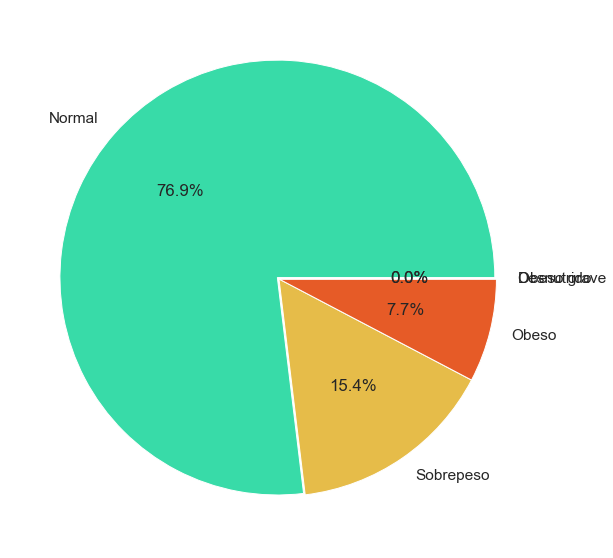

In [35]:
#Atenas
df_imc_atenas = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}


for atl in imc_Atenas:
    if 18.5 <= atl < 25:
        df_imc_atenas['Normal'] += 1
    elif 25 <= atl < 30:
        df_imc_atenas['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imc_atenas['Obeso'] += 1
    elif atl >= 40:
        df_imc_atenas['Obeso grave'] += 1
    else:
        df_imc_atenas['Desnutrido'] += 1

labels = list(df_imc_atenas.keys())
sizes = list(df_imc_atenas.values())
explode = (0.01, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, colors = ['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct='%1.1f%%')


plt.show()

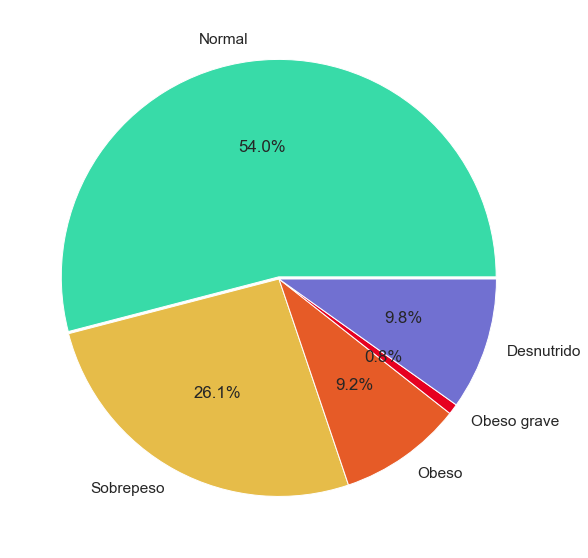

In [36]:
#RIO
df_imc_rio = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}


for atl in imc_Rio:
    if 18.5 <= atl < 25:
        df_imc_rio['Normal'] += 1
    elif 25 <= atl < 30:
        df_imc_rio['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imc_rio['Obeso'] += 1
    elif atl >= 40:
        df_imc_rio['Obeso grave'] += 1
    else:
        df_imc_rio['Desnutrido'] += 1

labels = list(df_imc_rio.keys())
sizes = list(df_imc_rio.values())
explode = (0.01, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, colors = ['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct='%1.1f%%')


plt.show()

## Dados gerais

In [37]:
mulheres = df_uni.loc[(df_uni['Sex'] == 'F')]
altura = df_uni['Height'].dropna(axis=0)
peso = df_uni['Weight'].dropna(axis=0)
idade = df_uni['Age'].dropna(axis=0)


print("Número de atletas Totais: " + str(len(df_uni)))
print('____________________________________________________\n')

print("Número de atletas femininas Totais: " + str(len(mulheres)))
print('____________________________________________________\n')

print("Altura média Totais: " + str(avg(altura)))
print("Peso média Totais: " + str(avg(peso)))
print('____________________________________________________\n')

print("Mais alto Totais: " + str(max(altura)))
print("Mais pesado Totais: " + str(max(peso)))

print('____________________________________________________\n')

print("Mais baixo Totais: " + str(min(altura)))
print("Mais leve Totais: " + str(min(peso)))

print('____________________________________________________\n')

print("Idade média Totais: " + str(avg(idade)))
print('____________________________________________________\n')

print("Mais novo Totais: " + str(min(idade)))
print('____________________________________________________\n')

print("Mais velho Totais: " + str(max(idade)))
print('____________________________________________________\n')

Número de atletas Totais: 135571
____________________________________________________

Número de atletas femininas Totais: 33981
____________________________________________________

Altura média Totais: 176.31540996507795
Peso média Totais: 71.96177224241701
____________________________________________________

Mais alto Totais: 226.0
Mais pesado Totais: 214.0
____________________________________________________

Mais baixo Totais: 127.0
Mais leve Totais: 25.0
____________________________________________________

Idade média Totais: 24.447977214151376
____________________________________________________

Mais novo Totais: 10.0
____________________________________________________

Mais velho Totais: 97.0
____________________________________________________

